# Normalizing Image Function for LEGO MiniFigure

Function to normalize each of the image based on file path given by the metadata

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision as tv
import torch
import pandas as pd

## Starting with an example to get a better idea of how to write the function

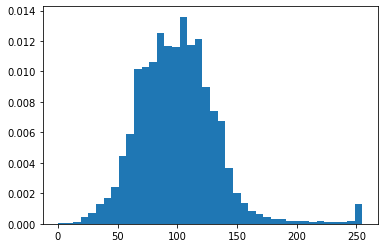

In [2]:
path = "Images/marvel/0001/001.jpg"
img = Image.open(path)

#Converts image to a numpy array
img_nparr = np.array(img)

#Creating histogram
in_hist = plt.hist(img_nparr.ravel(), bins = 40, density = True)

### Convert PIL image to PyTorch Tensor image

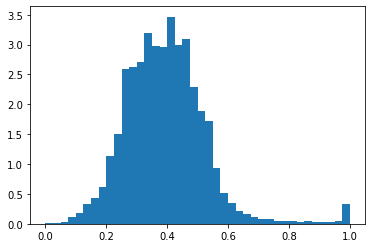

In [3]:
#Tensor transformation
transform1 = tv.transforms.Compose([
    tv.transforms.ToTensor()
])

#Putting image into function
tensor_img = transform1(img)
tensor_img_nparr = np.array(tensor_img)

#Another histogram
tensor_in_hist = plt.hist(tensor_img_nparr.ravel(), bins = 40, density = True)

In [4]:
#Finding mean and std of dataset
std, mean = torch.std_mean(tensor_img,[1,2])
print("Before normalizing --> Mean: " + str(mean) + " | STD: " + str(std))

Before normalizing --> Mean: tensor([0.4404, 0.3913, 0.3464]) | STD: tensor([0.1444, 0.1116, 0.1189])


### Normalizing based on mean/std

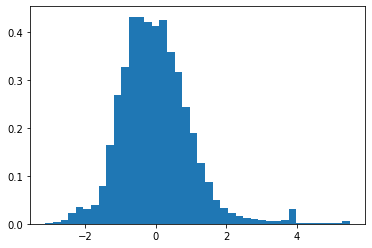

In [5]:
#Creating another transform func
transform1_norm = tv.transforms.Compose([
    tv.transforms.ToTensor(),
    tv.transforms.Normalize(mean,std)
])

#Transforming image to normalized tensor
norm_img = transform1_norm(img)
norm_img_nparr = np.array(norm_img)

#Yet another histogram
tensor_in_hist = plt.hist(norm_img_nparr.ravel(), bins = 40, density = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


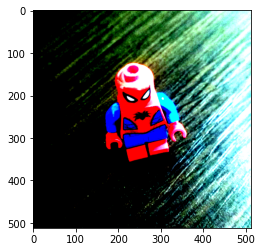

In [6]:
norm_img_view = norm_img_nparr.transpose(1,2,0)
plt.imshow(norm_img_view)


# Applying Above to Functions

In [22]:
lego_all = pd.read_csv('/Users/danieltohti/Box Sync/Launch/Week 3 Project/NeuralNet_Project/Images/data_all.csv')
lego_torch = torch.utils.data.TensorDataset(lego_all)

transform = tv.transforms.Compose([
    tv.transforms.ToPILImage(),
    tv.transforms.ToTensor()
])

dataloader = torch.utils.data.DataLoader(lego_torch)

pop_mean = []
pop_std0 = []
pop_std1 = []
for i, data in enumerate(dataloader, 0):
    np_image = data['path'].numpy()
    print(np_image)
    

TypeError: 'numpy.int64' object is not callable